# Прогнозирование временных рядов

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда.

In [1]:
%pylab inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';')

In [3]:
milk.head()

,month,milk
0,01.01.1962,589
1,01.02.1962,561
2,01.03.1962,640
3,01.04.1962,656
4,01.05.1962,727


([<matplotlib.axis.XTick at 0x7fd4a3b1afd0>,
 <a list of 10 Text xticklabel objects>)

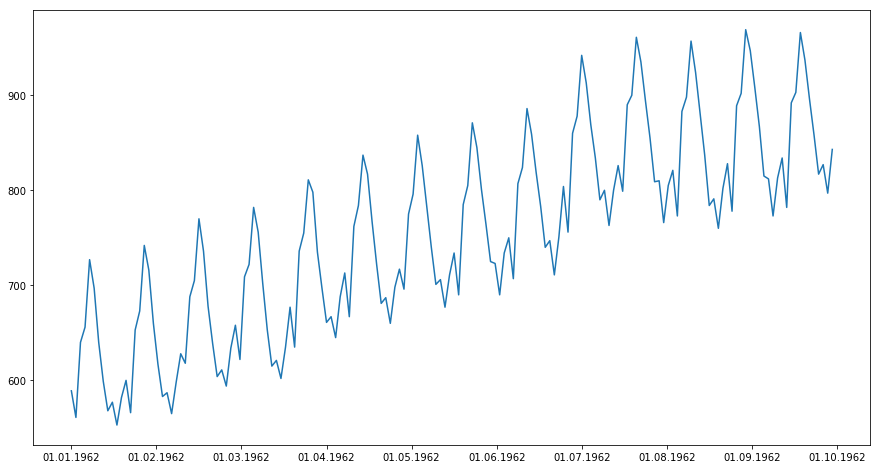

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(milk['month'], milk['milk'])
plt.xticks(np.linspace(0, len(milk['month']), 10), list(milk['month']))

In [5]:
new_time_row = []
for i in range(len(milk['milk'])):
    days_in_month = pd.Period("-".join([milk['month'][i][3:5], milk['month'][i][6:]])).days_in_month
    new_time_row.append(float(milk['milk'][i]) / days_in_month)

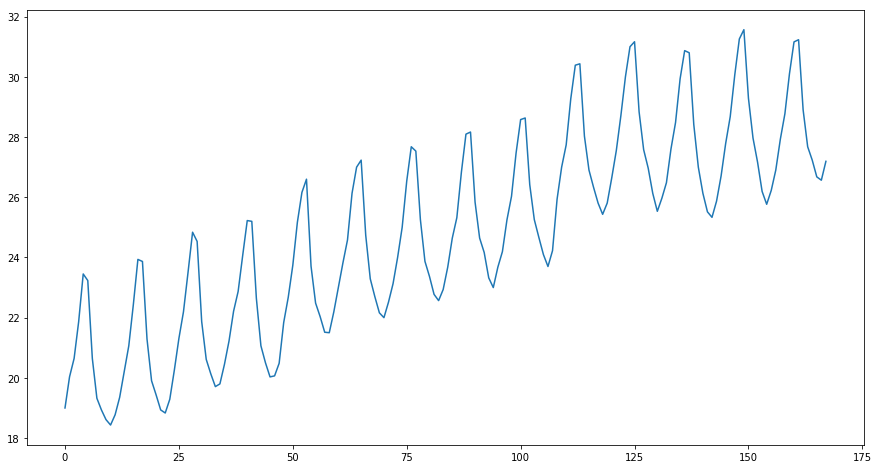

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(new_time_row)

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным. 

Дифференцирование можно делать так:

milk.daily_diff1 = milk.daily - milk.daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

milk.daily_diff12 = milk.daily - milk.daily.shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости. 

Итак, какое дифференцирование делает ряд стационарным?

In [7]:
import statsmodels.api as sm

In [8]:
milk.daily_diff1 = (milk.milk - milk.milk.shift(1))[1:]
milk.daily_diff12 = (milk.milk - milk.milk.shift(12))[12:]
milk.daily_diff112 = (milk.daily_diff1 - milk.daily_diff1.shift(12))[12:]
milk.daily_diff121 = (milk.daily_diff12 - milk.daily_diff12.shift(1))[1:]

/Volumes/Storage/Applications/Programming/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/Volumes/Storage/Applications/Programming/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/Volumes/Storage/Applications/Programming/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/Volumes/Storage/Applications/Prog

In [9]:
print 'p-value: ', sm.tsa.stattools.adfuller(milk.daily_diff1)[0]

p-value:  -3.0549955586530553


Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

import statsmodels.api as sm

sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)

<Figure size 1080x576 with 0 Axes>

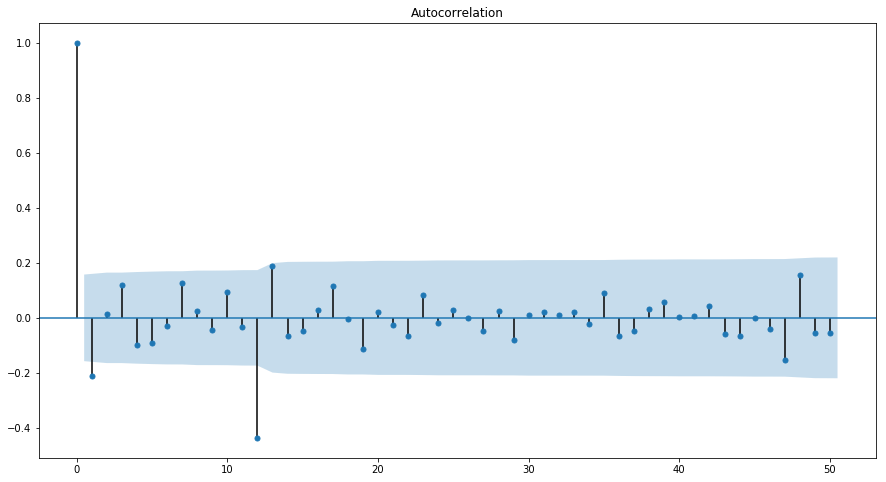

In [10]:
plt.figure(figsize(15,8))
sm.graphics.tsa.plot_acf(milk.daily_diff121.values.squeeze(), lags=50)
pylab.show()

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)

<Figure size 1080x576 with 0 Axes>

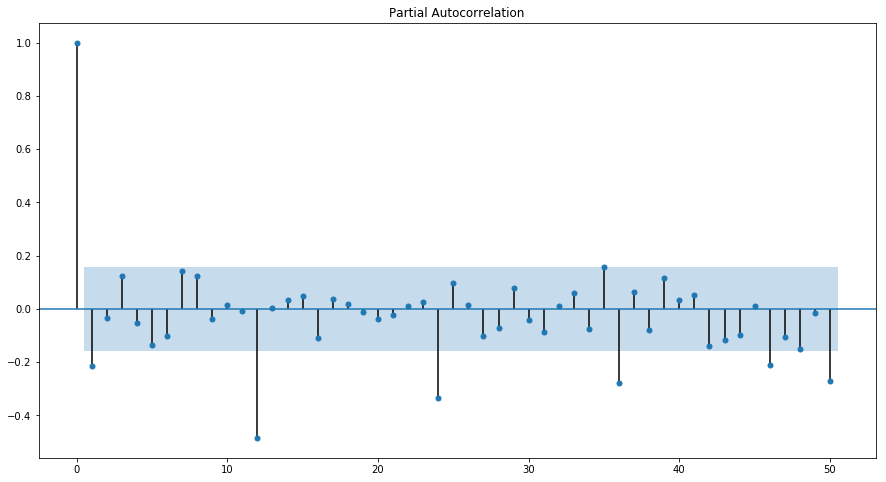

In [11]:
plt.figure(figsize(15,8))
sm.graphics.tsa.plot_pacf(milk.daily_diff121.values.squeeze(), lags=50)
pylab.show()